# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
#Check that the connection is working
api_key = weather_api_key
city_name = "London"
test_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}'
t_response = requests.get(test_url)
if t_response.status_code ==200:
    print("API key is working")
    print(t_response.json())
else:
    print(f"Error: {t_response.status_code}")

API key is working
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 277.12, 'feels_like': 274.35, 'temp_min': 274.61, 'temp_max': 278.68, 'pressure': 1003, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 240}, 'clouds': {'all': 6}, 'dt': 1699666563, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1699686655, 'sunset': 1699719489}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_response = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response['coord']['lat']
        city_lng = city_response['coord']['lon']
        city_max_temp = city_response['main']['temp_max']
        city_humidity = city_response['main']['humidity']
        city_clouds = city_response['clouds']['all']
        city_wind = city_response['wind']['speed']
        city_country = city_response['sys']['country']
        city_date = city_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
print(city_weather)
              
#ndicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | troitsko-pechorsk
Processing Record 3 of Set 1 | fisterra
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | marka
Processing Record 7 of Set 1 | lawton
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 10 of Set 1 | puerto deseado
Processing Record 11 of Set 1 | uwajima
Processing Record 12 of Set 1 | port-vila
Processing Record 13 of Set 1 | nyiradony
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | caucasia
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | el calafate
Processing Record 19 of Set 1 | walvis bay
Processing Record 20 of Set 1 | san angelo
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.92,92,100,15.47,TF,1699667186
1,troitsko-pechorsk,62.7084,56.1964,271.87,94,100,3.13,RU,1699667186
2,fisterra,42.9049,-9.2629,289.68,97,100,8.54,ES,1699667187
3,ribeira grande,38.5167,-28.7000,293.58,96,15,7.15,PT,1699667188
4,papatowai,-46.5619,169.4708,291.61,41,0,1.89,NZ,1699667188


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
# what Is the point of reading it from the csv we just made. 
# Is it to add index_col
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.92,92,100,15.47,TF,1699667186
1,troitsko-pechorsk,62.7084,56.1964,271.87,94,100,3.13,RU,1699667186
2,fisterra,42.9049,-9.2629,289.68,97,100,8.54,ES,1699667187
3,ribeira grande,38.5167,-28.7000,293.58,96,15,7.15,PT,1699667188
4,papatowai,-46.5619,169.4708,291.61,41,0,1.89,NZ,1699667188


In [10]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

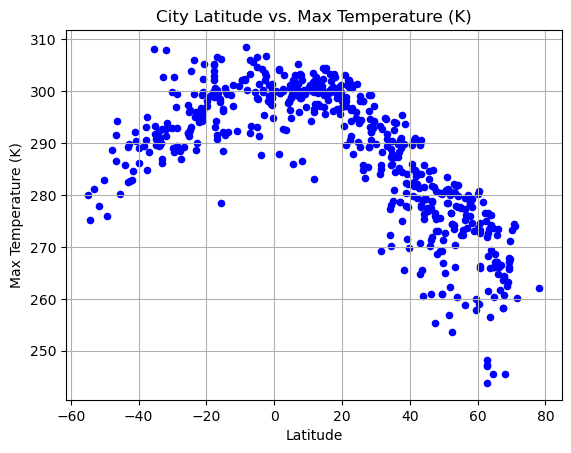

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Max Temp", color = 'blue', marker='o')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("City Latitude vs. Max Temperature (K)")
# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

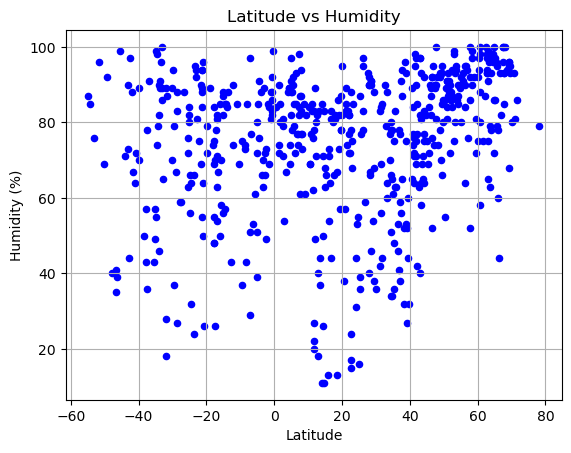

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y="Humidity", color = "blue", marker = "o")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

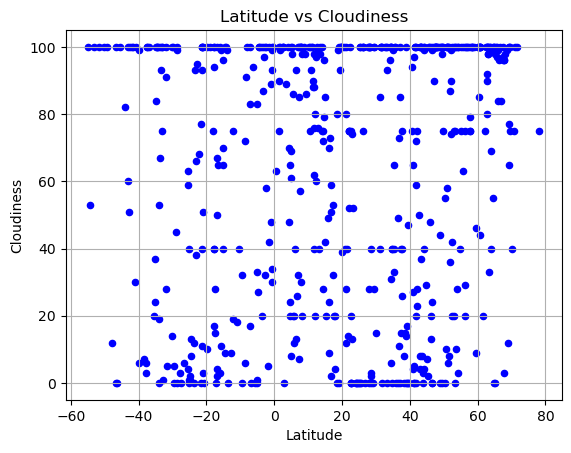

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x = "Lat", y="Cloudiness", color = "blue", marker = "o")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

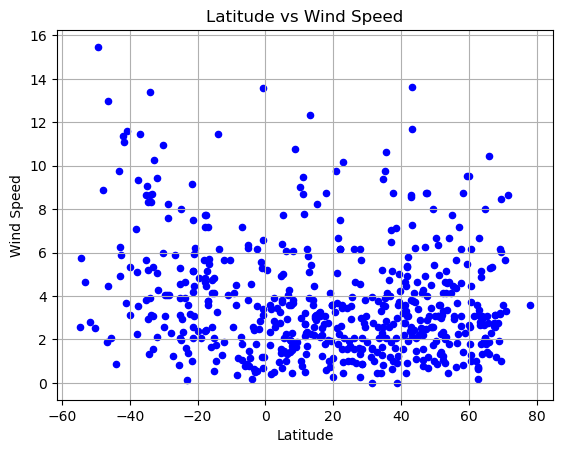

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x = "Lat", y="Wind Speed", color = "blue", marker = "o")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#regress_values = x * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + "x + " str(round(intercept, 2))

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_data = city_data_df.loc[pd.to_numeric(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,troitsko-pechorsk,62.7084,56.1964,271.87,94,100,3.13,RU,1699667186
2,fisterra,42.9049,-9.2629,289.68,97,100,8.54,ES,1699667187
3,ribeira grande,38.5167,-28.7000,293.58,96,15,7.15,PT,1699667188
5,marka,1.7159,44.7717,299.61,80,100,3.42,SO,1699667188
6,lawton,34.6087,-98.3903,285.97,34,40,2.57,US,1699666926


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.92,92,100,15.47,TF,1699667186
4,papatowai,-46.5619,169.4708,291.61,41,0,1.89,NZ,1699667188
8,puerto deseado,-47.7503,-65.8938,288.71,40,12,8.88,AR,1699666890
10,port-vila,-17.7338,168.3219,298.93,69,100,7.20,VU,1699667190
13,blackmans bay,-43.0167,147.3167,289.22,73,60,6.26,AU,1699667191


###  Temperature vs. Latitude Linear Regression Plot

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_data["Lat"], northern_hemi_data["Max Temp"])
regress_vals = northern_hemi_data["Lat"] * slope + intercept
#print(regress_vals)
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

y = -0.6x + 306.44
-0.867985219926379


The r-value is: 0.7161472181434118


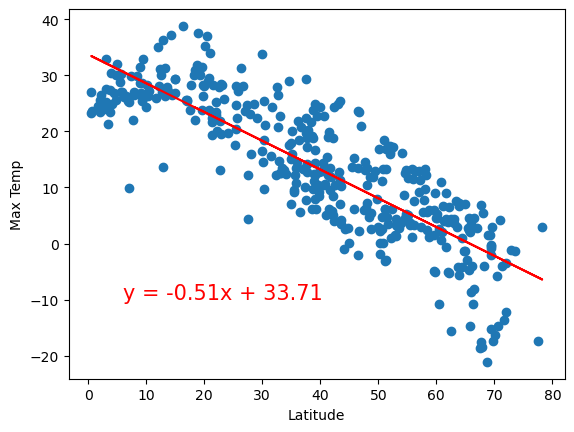

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_data["Lat"], northern_hemi_data["Max Temp"])

The r-value is: 0.4121057168607245


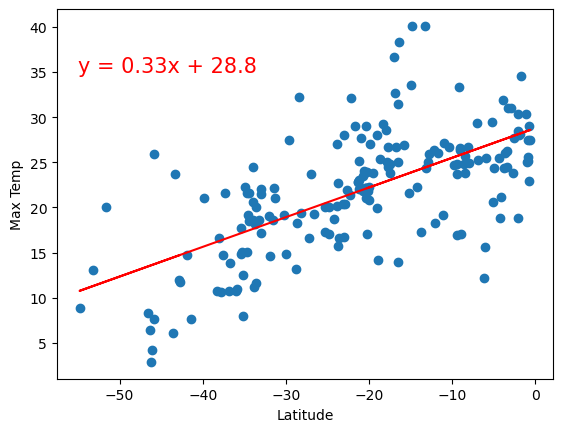

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


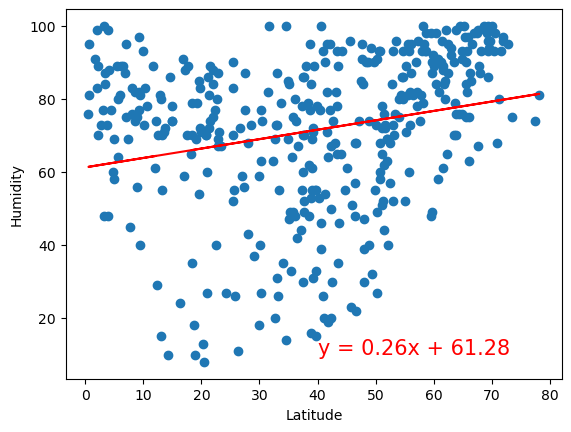

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


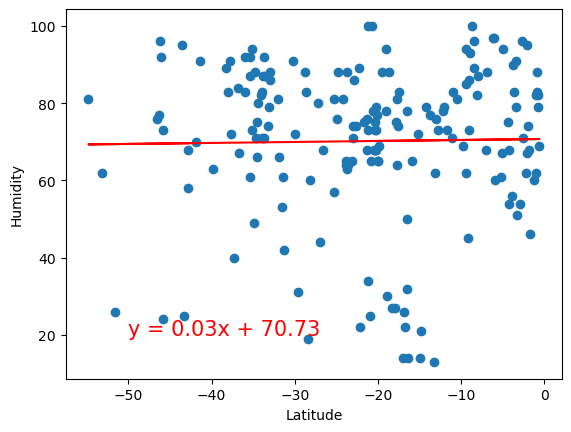

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


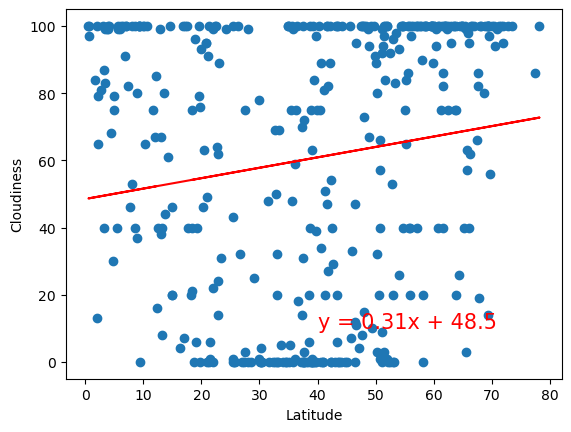

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


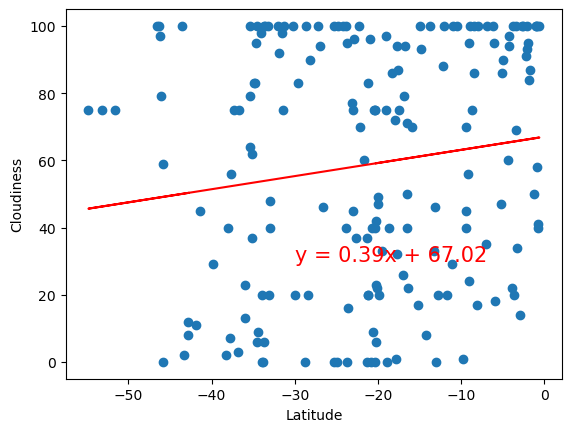

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


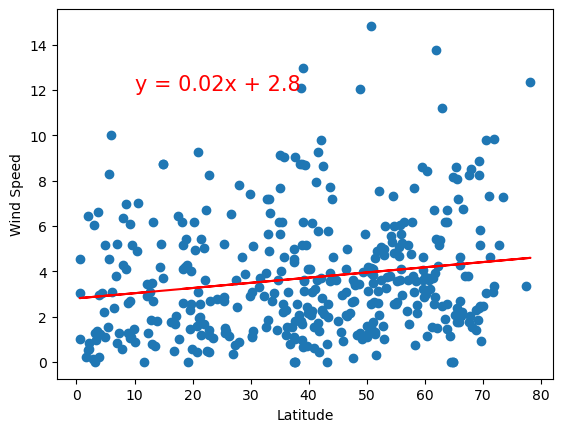

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


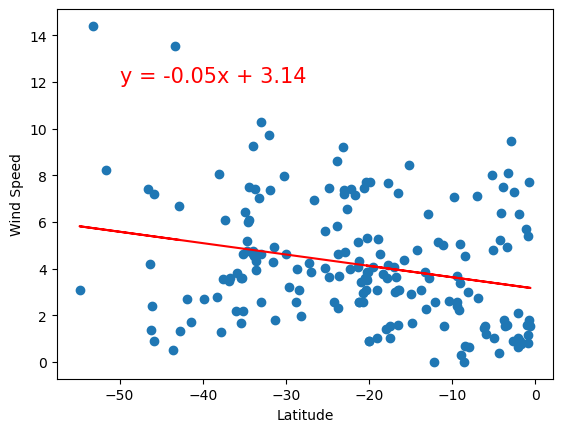

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE